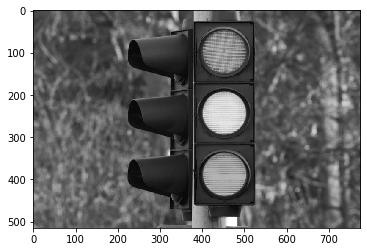

In [117]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
img = cv2.imread('light.jpg',0)
#th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,5,3)
plt.imshow(img,'gray')
img = cv2.resize(img,(int(img.shape[1] * 20 / 100),int(img.shape[0] * 20 / 100)))
plt.show()

In [126]:
classes = np.zeros(img.shape)
d = 25
k = 1
def g(arr,im,clas):
    a=0
    i,j = np.where(arr == clas)
    for k in zip(i,j):
        a+=im[k]
    return a/len(i)
for i in range(len(img)):
    for j in range(len(img[0])):
        if abs(int(img[i][j])-int(img[i][j-1]))>d and abs(int(img[i-1][j])-int(img[i][j]))>d:
            classes[i][j] = k
            k+=1
        elif abs(int(img[i][j])-int(img[i][j-1]))>d:
            classes[i][j] = classes[i-1][j]
        elif abs(int(img[i][j])-int(img[i-1][j]))>d:
            classes[i][j] = classes[i][j-1]
        else:
            if abs(g(classes,img,classes[i-1][j])-g(classes,img,classes[i][j-1])) < d:
                classes[classes == classes[i][j-1]] = classes[i-1][j]
                classes[i][j] = classes[i][j-1]
            elif abs(g(classes,img,classes[i-1][j])-g(classes,img,classes[i][j-1])) > d:
                classes[i][j] = min(abs(img[i][j] - g(classes,img,classes[i-1][j])),abs(img[i][j] - g(classes,img,classes[i][j-1])))

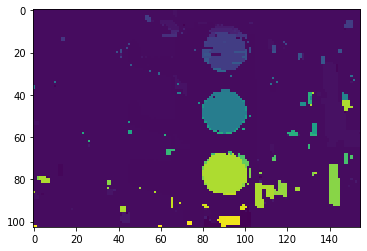

In [127]:
image = Image.fromarray(classes)
plt.imshow(image)